In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import glob
from scipy.interpolate import griddata
import os
from shutil import copyfile
import re

# Working with directores and files
## Inside the directore must have the invdir, and data folders. If there is no a pngs folder, the code create it for you.

In [2]:

#path_d = "../Example_files/"
path_d = "/home/felipe/tmp/test/"
#path_d = "/home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/"

#if os.path.exists(path_d + "invdir/ref"):
#    ref = path_d + "invdir/ref/f001_res.vtk" 
#    copyfile(ref,path_d + "invdir/" + "f000_res.vtk") 

files = [f for f in glob.glob(path_d + "invdir/f???_res.vtk")]
files.sort()

data = [d for d in glob.glob(path_d + "data/*.tx0")]
#data = [d for d in glob.glob(path_d + "data/*.tx0")]

data.sort()

if not os.path.exists(path_d + "pngs/rho"):
        os.makedirs(path_d + "pngs/rho")
#os.mkdir(path_+"pngs")

pngs = [p for p in glob.glob(path_d + "pngs/*.png")]

In [3]:
files

['/home/felipe/tmp/test/invdir/f001_res.vtk']

In [4]:
# Define the colormap
number_of_color = 2**3 ## not being used. I need to understand better how control the number of colors in cmap & palete
cmap = plt.cm.gist_earth  # define the colormap
#cmap = plt.cm.seismic
#cmaplist = [cmap(i) for i in np.linspace(0,cmap.N+1,number_of_color)]
cmaplist = [cmap(i) for i in range(cmap.N)]
#cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

In [5]:
# Define the axes
fig_size = (14, 6)
axes2 = [0.93, 0.1, 0.02, 0.8] # palete

text_size = 12
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

mm = np.zeros(2)
mm[0] = 10000
ref={}
diff=[]
for w,f in enumerate(files):
    if(str(f) not in str(pngs)):
        with open(f,'r') as fh:
            a = ' '
            while 'POINTS' not in a:
                a = (fh.readline().strip())
            string = re.sub('double',' ',re.sub('POINTS',' ', a))
            nnodal = int(string)
            Nodal = []
            Elem = []
            rho_truelog = []
            rho = []
            S = []
            dump = fh.readlines()
            for i, line in enumerate(dump):
                if(i < nnodal):
                    Nodal.append(line.split())
                elif (i == nnodal):
                    n = line.split()
                elif (i < int(n[1])+nnodal+1):
                    Elem.append(line.split())
                elif(i < int(n[1])+nnodal+7):
                    f = line.split()
                elif(i < int(n[1])+nnodal+8):
                    rho = line.split()
                elif(i < int(n[1])+nnodal+10):
                    f = line.split()
                elif(i < int(n[1])+nnodal+11):
                    rho_truelog = line.split()
                #elif(i < int(n[1])+nnodal+13):
                #    f = line.split()
                #elif(i < int(n[1])+nnodal+14):
                #    dif = line.split()
                #elif(i < int(n[1])+nnodal+16):
                #    f = line.split()
                #elif(i < int(n[1])+nnodal+17):
                #    S = line.split()
        Elem = np.asarray(Elem).astype(int)
        Nodal = np.asarray(Nodal).astype(float)
        #S = np.asarray(S).astype(float)
        #rho_truelog = np.asarray(rho_truelog).astype(float)
        rho = np.asarray(rho).astype(float)
        
        #if(mm[0] > min(rho_truelog)):
        #    mm[0] = min(rho_truelog)
        #if(mm[1] < max(rho_truelog)):
        #    mm[1] = max(rho_truelog)   
        
        
        if (w == 0):
            xmin = min(Nodal[:,0])
            xmax = max(Nodal[:,0]) 
            ymin = min(Nodal[:,1]) # + ? 
            ymax = max(Nodal[:,1]) + 0.5 
            
        #if(plot == 'rho'):
        #    vmin = min(rho)
        #    vmax = max(rho)
            
        #elif(plot == 'rho_log'):
        #    vmin = min(rho_truelog)
        #    vmax = max(rho_truelog)
            
        #else:
        #    for i,e in enumerate(Elem):
            
        #        index1 = int(e[1]) 
        #        index2 = int(e[2])
        #        index3 = int(e[3])
            
        #        polygon = ((Nodal[index1,0], Nodal[index1,1]), \
        #               (Nodal[index2,0],Nodal[index2,1]), \
        #               (Nodal[index3,0], Nodal[index3,1]), \
        #               (Nodal[index1,0], Nodal[index1,1]))
            
        #        if(w == 0):
        #            ref.update({polygon:rho[i]})
            
        #        diff.append(float(rho[i]) - float(ref[polygon]))        

# Choose mm (values min and max) based on your data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean:  nan 245.73278128353658
Std:  nan 372.48600665795624


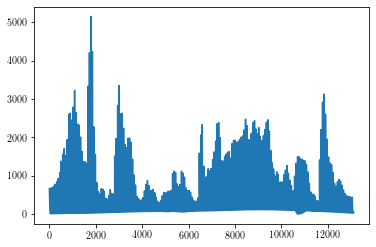

In [6]:
plt.plot(rho)
a=np.asarray(rho)
print("Mean: ",a[a<0].mean(), a[a>0].mean())
print("Std: ",a[a<0].std(), a[a>0].std())

In [7]:
mm

array([1.19752, 3.54253])

Working on /home/felipe/tmp/test/invdir/f001_res.vtk
0 26523
/home/felipe/tmp/test/data/2019-11-01_02-43-22.tx0
/home/felipe/tmp/test/pngs/rho/2019-11-01_02-43-22.png
rho/2019-11-01_02-43-22


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


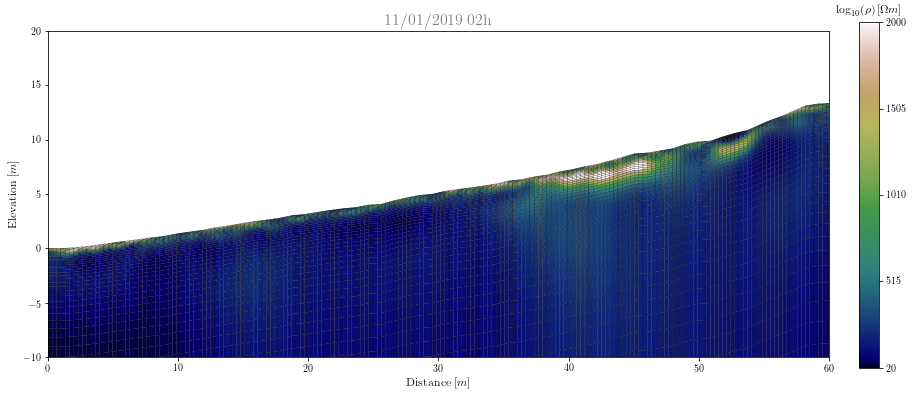



Images saved in /home/felipe/tmp/test/pngs/rho/


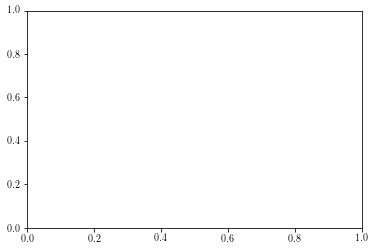

In [8]:
ref = {}
mm = [20, 2000]
bounds = np.linspace(mm[0], mm[1], cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for w,f in enumerate(files):
    if(str(f) not in str(pngs)):
        print("Working on " + f)
                
        fig, ax = plt.subplots(1, 1, figsize = fig_size)
        ax.set_xlim(0,60)
        ax.set_ylim(-10,20)
        #ax.set_xlim(xmin,xmax)
        #ax.set_ylim(ymin,ymax)
        ax.set_xlabel("Distance [$m$]",size=text_size)
        ax.set_ylabel("Elevation [$m$]",size=text_size)
       
        with open(f,'r') as fh:
            a = ' '
            while 'POINTS' not in a:
                a = (fh.readline().strip())
            string = re.sub('double',' ',re.sub('POINTS',' ', a))
            nnodal = int(string)
            Nodal = []
            Elem = []
            rho_truelog = []
            rho = []
            S = []
            dump = fh.readlines()
            for i, line in enumerate(dump):
                if(i < nnodal):
                    Nodal.append(line.split())
                elif (i == nnodal):
                    n = line.split()
                elif (i < int(n[1])+nnodal+1):
                    Elem.append(line.split())
                elif(i < int(n[1])+nnodal+7):
                    f = line.split()
                elif(i < int(n[1])+nnodal+8):
                    rho = line.split()
                elif(i < int(n[1])+nnodal+10):
                    f = line.split()
                elif(i < int(n[1])+nnodal+11):
                    rho_truelog = line.split()
                elif(i < int(n[1])+nnodal+13):
                    f = line.split()
                elif(i < int(n[1])+nnodal+14):
                    dif = line.split()
                    print(w,i)
                elif(i < int(n[1])+nnodal+16):
                    f = line.split()
                elif(i < int(n[1])+nnodal+17):
                    S = line.split()
        Elem = np.asarray(Elem).astype(int)
        Nodal = np.asarray(Nodal).astype(float)
        #S = np.asarray(S).astype(float)
        #rho_truelog = np.asarray(rho_truelog).astype(float)
        rho = np.asarray(rho).astype(float)
        polies = []
        for i,e in enumerate(Elem):
            
            index1 = int(e[1]) 
            index2 = int(e[2])
            index3 = int(e[3])
            index4 = int(e[4])
            
            polygon = ((Nodal[index1,0], Nodal[index1,1]), \
                       (Nodal[index2,0],Nodal[index2,1]), \
                       (Nodal[index3,0], Nodal[index3,1]), \
                       (Nodal[index4,0], Nodal[index4,1]), \
                       (Nodal[index1,0], Nodal[index1,1]))
            
            polies.append(polygon)
            
            if(w == 0):
                ref.update({polygon:rho[i]})
            
            indexC = float(rho[i]) # - float(ref[polygon])   
            indice = int( (indexC - mm[0])*(len(cmaplist)-1) / (mm[1] - mm[0]))
            
            if (indice >= 256):
                indice = 255;
            elif(indice < 0):
                indice = 0
            
            plotC = cmaplist[indice]  
                        
            codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]#patches.append(polygon)
            path = Path(polygon,codes)
       
            patch = patches.PathPatch(path, facecolor=plotC, edgecolor=None, lw=0.2)
            #if(i > 498 and i < 1000):
            ax.add_patch(patch)

        ax2 = fig.add_axes(axes2)
        #ax2.set_ylabel('Resistivity [$\Omega m$]',size=text_size)
        ax2.set_title('$ \log_{10}(\\rho) \, [\Omega m]$',size=text_size)
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=[np.linspace(np.around(mm[0]),np.around(mm[1]),5)], boundaries=bounds)
         
        print(data[w])    
        fname = path_d + 'pngs/rho/' + re.sub(path_d,' ',data[w])[6:-3] + 'png'
        print(fname)
        title = re.sub(path_d,' ',fname)[6:-4]
        print(title)
        ax.set_title(title[9:11] + '/' + title[12:14] + '/' + title[4:8] + ' ' + title[15:17] + 'h',fontsize=16, color='gray')
        plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
        plt.show()
        plt.close(fig)
        plt.clf()
        plt.cla()
print("\n\nImages saved in " + path_d + 'pngs/rho/')

In [261]:
polies[0]

((-20.77884, 0.0),
 (-20.77884, -0.055),
 (-13.18597, -0.055),
 (-13.18597, 0.0),
 (-20.77884, 0.0))

In [72]:
polies[1][1]

(0.0, -0.1155)

In [70]:
xpolies[1][3][0]

0.24997

In [12]:
k = []
ncol = 63
with open("/home/felipe/ert.in",'w') as gh:
    gh.write("***GEOMETRY INPUT INFORMATION***\nnnodesX nnodesZ\n")
    x = []
    z = []
    xz = polies[0]
    x_mean = (polies[0][0][0] + polies[0][1][0] \
            + polies[0][2][0] + polies[0][3][0]) / 4.0
    z_mean = (polies[0][0][1] + polies[0][1][1] \
            + polies[0][2][1] + polies[0][3][1]) / 4.0
#zz = polies[0]
    col = []
    #col.append(abs(polies[0][1][1] - polies[0][0][1]))
    cols = []
#dic = {}
    m = 0
    for i, e in enumerate(polies):
        x.append(polies[i][0][0])
        x.append(polies[i][1][0])
        x.append(polies[i][2][0])
        x.append(polies[i][3][0])
        xmean = (polies[i][0][0] + polies[i][1][0] \
                + polies[i][2][0] + polies[i][3][0]) / 4.0
        z.append(polies[i][0][1])
        z.append(polies[i][1][1])
        z.append(polies[i][2][1])
        z.append(polies[i][3][1])
        zmean = (polies[i][0][1] + polies[i][1][1] \
                + polies[i][2][1] + polies[i][3][1]) / 4.0
    xloc = len(set(x)) - 2
    zloc = xloc * ncol #set(z)
    #dx = polies[0][3][0] - polies[0][0][0]
    gh.write(str(xloc) + " " + str(zloc)+ "\n")
    gh.write("xloc zloc slope dx ds\n")
    gh.write(str(xmean) + " " + str(zmean))
    x = []
    z = []
    for i, e in enumerate(polies):
        x.append(polies[i][0][0])
        x.append(polies[i][1][0])
        x.append(polies[i][2][0])
        x.append(polies[i][3][0])
        xmean = (polies[i][0][0] + polies[i][1][0] \
                + polies[i][2][0] + polies[i][3][0]) / 4.0
        z.append(polies[i][0][1])
        z.append(polies[i][1][1])
        z.append(polies[i][2][1])
        z.append(polies[i][3][1])
        zmean = (polies[i][0][1] + polies[i][1][1] \
                + polies[i][2][1] + polies[i][3][1]) / 4.0
    
        if(i == 0):
            slope = np.arctan( (polies[i][0][1] - xz[0][1]) / (polies[i][0][0] - xz[0][0]))
            dx = xmean - x_mean
            ds = dx / np.cos(dx)
            gh.write(str(xmean)+ " " + str(zmean) \
                     + " " + str(slope) + " " + str(dx)+ " " + str(ds) + "\n")
            
        if(polies[i][0][0] == xz[3][0] \
               and polies[i][0][1] == xz[3][1]):
            slope = np.arctan( (polies[i][0][1] - xz[0][1]) / (polies[i][0][0] - xz[0][0]))
            dx = xmean - x_mean
            ds = dx / np.cos(dx)
            gh.write(str(xmean)+ " " + str(zmean) \
                     + " " + str(slope) + " " + str(dx)+ " " + str(ds) + "\n")
            xz = polies[i]
            x_mean = (polies[i][0][0] + polies[i][1][0] \
                    + polies[i][2][0] + polies[i][3][0]) / 4.0
            z_mean = (polies[i][0][1] + polies[i][1][1] \
                    + polies[i][2][1] + polies[i][3][1]) / 4.0
        #zz = polies[i]
            cols.append(col)
            if(len(col) > m or len(col) < m):
                m = len(col)
                k.append(m)
            col = []
    
        else:
        #dic.update({col:zz[2][1]})
            #if(i > 0):
            col.append(abs(polies[i][1][1] - polies[i][0][1]))
    m = max(k)
    gh.write("dz (bottom to top)\n")
    A = np.zeros([m,len(cols)])
    for i, c in enumerate(cols):
        for j,v in enumerate(c):
            A[j,i] = v
    #for i in range(min(k)-1,0,-1):
    for i in range(ncol-1,0,-1):
        gh.write(' '.join(map(str,A[i,:][A[i,:]!=0]))+"\n")

In [349]:
len(A[0])*ncol

12852

In [227]:
' '.join(map(str, A[i,:][A[i,:]!=0]))

'-1.7002000000000006 -1.70019 -1.7001899999999992 -1.7001999999999997 -1.7001999999999997 -1.7002000000000006 -1.7001999999999997 -1.7001999999999997 -1.7001999999999997 -1.70019 -1.7001999999999997 -1.7001999999999997 -1.7002000000000006 -1.7002000000000002 -1.7002000000000002 -1.7001999999999997 -1.7002000000000002 -1.7001999999999997 -1.7002000000000002 -1.7001999999999997 -1.7002000000000002'

In [333]:
63*204

12852

In [283]:
x = []
z = []
xz = polies[0]
#zz = polies[0]
print(polies[0][0][0], polies[0][0][1], 0.0)
col = []
col.append(abs(polies[0][1][1] - polies[0][0][1]))
cols = []
#dic = {}
m = 0
for i, e in enumerate(polies):
    x.append(polies[i][0][0])
    x.append(polies[i][1][0])
    x.append(polies[i][2][0])
    x.append(polies[i][3][0])
    z.append(polies[i][0][1])
    z.append(polies[i][1][1])
    z.append(polies[i][2][1])
    z.append(polies[i][3][1])
xloc = set(x)
zloc = set(z)
gh.write(len(xloc), len(zloc))
for i, e in enumerate(polies):
    x.append(polies[i][0][0])
    x.append(polies[i][1][0])
    x.append(polies[i][2][0])
    x.append(polies[i][3][0])
    z.append(polies[i][0][1])
    z.append(polies[i][1][1])
    z.append(polies[i][2][1])
    z.append(polies[i][3][1])
    
    if(polies[i][0][0] == xz[3][0] \
           and polies[i][0][1] == xz[3][1]):
        #gh.write(str(polies[i][0][0])+ " " + \
        #         str(polies[i][0][1]) + " " + \
        #         str(polies[i][0][0] - xz[0][0])
        xz = polies[i]
        #zz = polies[i]
        cols.append(col)
        if(len(col) > m):
            m = len(col)
        col = []
    
    else:
        #dic.update({col:zz[2][1]})
        if(i > 0):
            col.append(abs(polies[i][1][1] - polies[i-1][1][1]))
A = np.zeros([m,len(cols)])
for i, c in enumerate(cols):
    for j,v in enumerate(c):
        A[j,i] = v
        
    

-20.77884 0.0 0.0


TypeError: write() takes exactly one argument (2 given)

In [212]:
gh.write(str(len(xloc)) + " " + str(len(zloc)))

ValueError: I/O operation on closed file.

In [149]:
t = np.asarray(teste[1])

In [150]:
t
    

array([-0.11931, -0.18586, -0.25907, -0.33959, -0.42817, -0.5256 ,
       -0.63278, -0.75068, -0.88037, -1.02302, -1.17995, -1.35256,
       -1.54243, -1.7513 , -1.98105, -2.23377, -2.51176, -2.81756,
       -3.15394, -3.52395, -3.93096, -4.37868, -4.87116, -5.4129 ])

In [183]:
A = np.zeros([m,len(cols)])
for i, c in enumerate(cols):
    for j,v in enumerate(c):
        A[j,i] = v 
        

In [203]:
for i in range(m-1,0,-1):
    print(A[i,:][A[i,:]!=0])

[-1.7002  -1.70019 -1.70019 -1.7002  -1.7002  -1.7002  -1.7002  -1.7002
 -1.7002  -1.70019 -1.7002  -1.7002  -1.7002  -1.7002  -1.7002  -1.7002
 -1.7002  -1.7002  -1.7002  -1.7002  -1.7002 ]
[-1.54564 -1.54564 -1.54564 -1.54563 -1.54563 -1.54563 -1.54563 -1.54563
 -1.54563 -1.54564 -1.54564 -1.54564 -1.54563 -1.54563 -1.54563 -1.54563
 -1.54564 -1.54564 -1.54564 -1.54563 -1.54563 -1.54563 -1.54563 -1.54563
 -1.54564 -1.54564 -1.54563 -1.54563 -1.54563 -1.54563 -1.54563 -1.54563
 -1.54563 -1.54563 -1.54563 -1.54563 -1.54564]
[-1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40513
 -1.40513 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512
 -1.40512 -1.40512 -1.40512 -1.40512 -1.40513 -1.40513 -1.40512 -1.40512
 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40513
 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40513 -1.40512
 -1.40512 -1.40512 -1.40512 -1.40512 -1.40512 -1.40513 -1.40513 -1.40512
 -1.40512 -1.40512 -1.40512 -1.4

In [200]:
A[A!=0]

array([-0.055 , -0.0605, -0.0605, ..., -1.7002, -1.7002, -1.7002])